<a href="https://colab.research.google.com/github/CallmeQuant/Studying-Notebook/blob/main/Vietnam_Stock_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTING LIBRARY AND MODULES**

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! ls /content/drive/My\ Drive/Ultis\ ML/*.py

'/content/drive/My Drive/Ultis ML/DA_RNN.py'
'/content/drive/My Drive/Ultis ML/DataCrawling.py'
'/content/drive/My Drive/Ultis ML/LSTM_ARIMA.py'
'/content/drive/My Drive/Ultis ML/Modules_GAN.py'
'/content/drive/My Drive/Ultis ML/Modules.py'
'/content/drive/My Drive/Ultis ML/Triple_Barrier_Labeling.py'
'/content/drive/My Drive/Ultis ML/Ultility.py'
'/content/drive/My Drive/Ultis ML/Wavenet_LSTM.py'


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Ultis ML/')

In [4]:
import numpy as np
import datetime
from copy import deepcopy
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from torch.utils.data import Dataset
# from torch.utils.data import DataLoader

import scipy
from random import random
from random import randint
import itertools
!pip install riskfolio-lib
import riskfolio as rp
from glob import  glob
from cvxopt import matrix
from cvxopt import solvers
import cvxpy as cv
solvers.options['show_progress'] = False

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd 

import warnings
# ! pip install dtype-diet
# from dtype_diet import report_on_dataframe, optimize_dtypes
from DataCrawling import DataLoaderVND
print("All libraries has been loaded successfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 23.0 MB/s eta 0:00:00
All libraries has been loaded successfully!


## **DATA LOADING (OLD)**

In [5]:
def read_data_stock(stock_indices =  ["VCB"], features =  ['open', 'high','close','adjust','low'],
              start_date = "2021-01-04", end_date = "2022-12-30"):
  loader = DataLoaderVND(symbols = stock_indices, start = start_date, end = end_date)
  df = loader.download()
  if len(stock_indices) == 1:
    df = df.droplevel(1, axis = 1)
    df = df[[c for c in df.columns if c in features]]
    df.set_index(pd.date_range(start = start_date, end = end_date), inplace = True)
  else:
    df = df.loc[:, df.columns.get_level_values(0) == 'adjust'].droplevel(0, axis = 1)
    df.set_index(pd.date_range(start = start_date, end = end_date), inplace = True)
  return df

In [6]:
stock_indices = ['VCB','VIB','TCB','CTG','BID','VNM','MWG','MSN','MBB','FPT']

loader = DataLoaderVND(symbols = stock_indices, start = "2021-01-04", end = "2022-12-30")
df = loader.download()

In [7]:
df.head(10)

Attributes,adjust,close,change_perc,avg,volume_match,value_match,volume_reconcile,value_reconcile,open,high,...,change_perc,avg,volume_match,value_match,volume_reconcile,value_reconcile,open,high,low,volume
Symbols,VCB,VCB,VCB,VCB,VCB,VCB,VCB,VCB,VCB,VCB,...,FPT,FPT,FPT,FPT,FPT,FPT,FPT,FPT,FPT,FPT
date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,39.268,42.0,0.0000,42.000,0.0,0.000000e+00,0.0,0.0,42.0,42.0,...,0.0000,44.000,0.0,0.000000e+00,0.0,0.0,44.0,44.0,44.0,0.0
2022-12-30,36.324,39.1,0.0000,39.100,0.0,0.000000e+00,0.0,0.0,39.1,39.1,...,-12.5000,0.702,2004614.0,1.407241e+09,0.0,0.0,0.8,0.8,0.7,2004614.0
2022-12-30,27.715,28.2,0.0000,28.200,0.0,0.000000e+00,0.0,0.0,28.2,28.2,...,0.0000,10.700,0.0,0.000000e+00,0.0,0.0,10.7,10.7,10.7,0.0
2022-12-30,29.356,31.6,0.0000,31.590,50500.0,1.595310e+09,0.0,0.0,31.6,32.0,...,2.7778,37.000,500.0,1.850000e+07,0.0,0.0,37.0,37.0,37.0,500.0
2022-12-30,1.300,1.3,8.3333,1.290,1096.0,1.395600e+06,0.0,0.0,1.2,1.3,...,0.0000,1.585,53800.0,8.528000e+07,0.0,0.0,1.6,1.6,1.5,53800.0
2022-12-30,3.000,3.0,-3.2258,2.919,62400.0,1.821500e+08,0.0,0.0,3.0,3.0,...,0.0000,39.900,0.0,0.000000e+00,0.0,0.0,39.9,39.9,39.9,0.0
2022-12-30,8.400,8.4,0.0000,8.400,0.0,0.000000e+00,0.0,0.0,8.4,8.4,...,14.7493,35.633,300.0,1.069000e+07,0.0,0.0,34.0,38.9,34.0,300.0
2022-12-30,23.616,24.0,-2.4390,23.919,3100.0,7.415000e+07,0.0,0.0,21.5,24.0,...,0.0000,32.900,0.0,0.000000e+00,0.0,0.0,32.9,32.9,32.9,0.0


In [8]:
df = read_data_stock(stock_indices = ['VCB','VIB','TCB','CTG','BID','VNM','MWG','MSN','MBB','FPT'])

print(df.head(10))

Symbols        VCB     VIB     TCB     CTG     BID     VNM     MWG     MSN  \
2021-01-04  39.268  44.000  39.268  44.000  44.000  39.268  39.268  44.000   
2021-01-05  36.324   0.700  36.324   0.700   0.700  36.324  36.324   0.700   
2021-01-06  27.715  10.105  27.715  10.105  10.105  27.715  27.715  10.105   
2021-01-07  29.356  37.000  29.356  37.000  37.000  29.356  29.356  37.000   
2021-01-08   1.300   1.600   1.300   1.600   1.600   1.300   1.300   1.600   
2021-01-09   3.000  38.599   3.000  38.599  38.599   3.000   3.000  38.599   
2021-01-10   8.400  37.476   8.400  37.476  37.476   8.400   8.400  37.476   
2021-01-11  23.616  32.900  23.616  32.900  32.900  23.616  23.616  32.900   
2021-01-12  38.900   2.400  38.900   2.400   2.400  38.900  38.900   2.400   
2021-01-13  10.105  55.100  10.105  55.100  55.100  10.105  10.105  55.100   

Symbols        MBB     FPT  
2021-01-04  44.000  44.000  
2021-01-05   0.700   0.700  
2021-01-06  10.105  10.105  
2021-01-07  37.000  37.00

## **DATA LOADING (NEW)**

In [89]:
# df = pd.read_csv('drive/My Drive/data/return_data_portfolio_management.csv', index_col = [0])
# df['date'] = pd.to_datetime(df['date'])
# df.set_index('date', drop = True, inplace = True)
# df = pd.read_csv('drive/My Drive/data/return_data_portfolio_management.csv', parse_dates = ['date'], dayfirst = True)
# df = df.set_index('date')

## **EDA**

### **Return Computation**

In [10]:
# First approach: Using facts that log return = log(1 + simple return)
%%timeit
log_ret_vcb = np.log1p(df['TCB'].pct_change())

2.81 ms ± 518 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# Same with first but using apply() function (not recommended)
%%timeit
log_ret_vcb1 = df['TCB'].pct_change().apply(lambda x: np.log(1 + x))

4.46 ms ± 687 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
# Second approach: Using direct formula log return = log(R_t+1 / R_t) = log(R_t+1) - log(R_t)
%%timeit
log_ret_vcb2 = np.log(df['TCB'] / df['TCB'].shift(1))

745 µs ± 164 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [92]:
return_df = np.log(df/df.shift(1)).dropna()
return_df = return_df[~return_df.isin([np.inf, -np.inf, np.nan]).all(axis='columns')]

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [93]:
return_df.head(10)

,CII,DIG,HPG,HT1,HSG,GAS,GVR,TPB,TCB,MSN
date,,,,,,,,,,
2020-01-15,0.386852,-inf,-1.627573,0.433488,0.763146,0.826813,0.114403,-0.880178,-inf,-1.356568
2020-01-31,0.019875,0.035946,0.225849,0.006541,0.536165,0.687728,0.221102,1.530475,0.056814,-inf
2020-08-04,0.738776,-0.838718,-2.571827,-0.264836,-1.229685,-0.659479,-1.321138,1.650995,-0.606690,-0.436406
2020-08-05,-inf,0.529183,2.422980,1.357517,0.381646,-0.584414,0.732988,-0.973431,0.853093,-0.357296
2020-08-24,1.548745,0.554067,0.591939,-0.584073,-0.013221,-0.003464,-0.452194,-0.408662,0.515771,0.509436
2021-01-27,-inf,0.092951,0.396152,-1.279300,0.061178,1.155188,0.002157,1.022700,0.661751,0.963043
2021-02-03,0.560631,0.327080,-0.407439,0.375124,0.179036,0.958730,0.773813,0.408746,-0.629389,0.857441
2021-02-17,0.982435,1.210563,0.584001,0.331763,1.014014,0.842120,2.749612,0.240412,0.828974,0.030086
2021-03-30,-3.530679,1.932286,0.449342,-inf,-0.450997,-1.066961,-0.478726,-0.579783,1.195785,2.461586


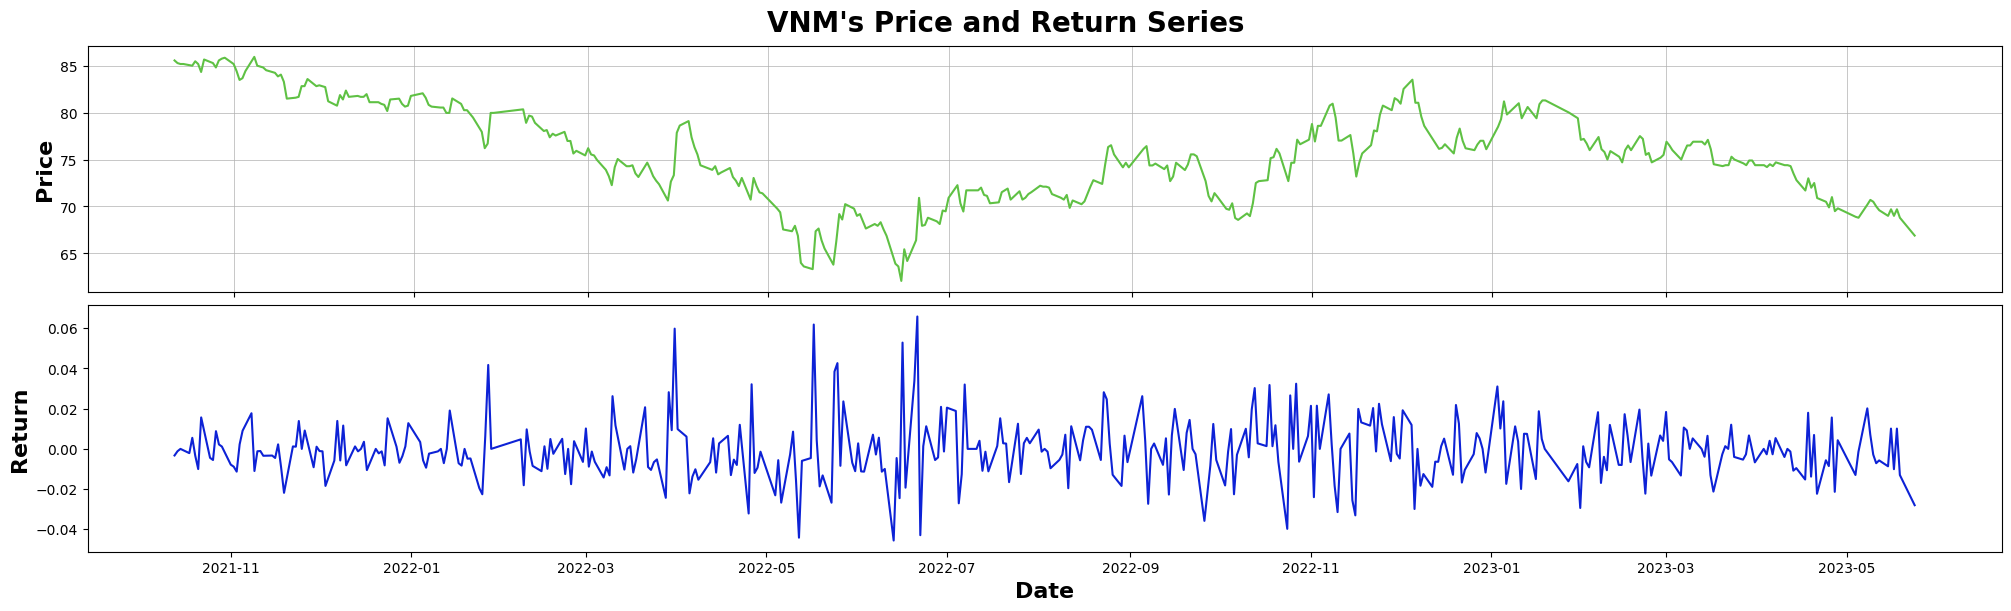

In [15]:
fig, axs = plt.subplots(2,1,figsize=(20,6), constrained_layout=True)

fig.suptitle('VNM\'s Price and Return Series', weight="bold", size=20)
axs[0].grid(True, linewidth=0.5)

axs[0].plot(df.index, df['VNM'], label='Price', c='#5FC144', alpha=1, linewidth=1.5)
# axs[0].set_xlabel('Date', weight="bold", size=16)
axs[0].set_ylabel('Price', weight="bold", size=16)
axs[0].set_xticklabels([])
# axs[0].set_title('Closing Price Comparison', weight="bold", size=18)
# axs[0].legend(fontsize="large", title="VNM", title_fontsize=12)

axs[1].plot(return_df.index, return_df['VNM'], label='Return', color='#0D22D6', alpha=1, linewidth=1.5)
axs[1].set_xlabel('Date', weight="bold", size=16)
axs[1].set_ylabel('Return', weight="bold", size=16)
# axs[1].set_title('Close Moving Average', weight="bold", size=18)
# axs[1].legend(fontsize="large", title="Period", title_fontsize=12, loc='upper left')
plt.savefig('stock_analysis.png')
plt.show()

### **Security Analysis**

In [16]:
# define a simple function to compute basic statistics of returns 
def basic_stats(ret, stock = None, is_return_df = True):
  if is_return_df:
    df = pd.DataFrame(ret.mean())
    df.columns = ['Mean']
    df['Std']=ret.std()
    df['Variance']=ret.var()
    df['Skew']=ret.skew()
    df['Kurtosis']=ret.kurt()
    return df
  else:
    stock_ret = np.array(df['stock'])
    df = pd.DataFrame(stock_ret.mean(), stock_ret.std(),
                      stock_ret.var(), stock_ret.skew(), stock_ret.kurt())
    df.columns = ['Mean','Std','Variance','Skewness','Kurtosis']
    return df

In [17]:
moments_ret = basic_stats(return_df)
moments_ret['p-value'] = scipy.stats.normaltest(return_df, axis = 0, nan_policy = 'propagate')[1]
moments_ret['normality'] = np.where(moments_ret['p-value'] < 0.1, 'Non-normal',
                                    'Normal')

In [18]:
moments_ret

,Mean,Std,Variance,Skew,Kurtosis,p-value,normality
CII,-0.000385,0.039589,0.001567,-0.177492,-0.609389,6.264386e-04,Non-normal
DIG,-0.000896,0.047176,0.002226,-0.085739,-1.207865,4.981493e-55,Non-normal
HPG,-0.001722,0.026561,0.000705,0.057767,1.007316,9.149662e-03,Non-normal
HT1,-0.001271,0.030322,0.000919,-0.341997,0.622356,2.247211e-03,Non-normal
GAS,-0.000388,0.023584,0.000556,-0.114223,1.429294,4.688292e-04,Non-normal
GVR,-0.001994,0.031123,0.000969,-0.432387,0.492127,5.472165e-04,Non-normal
TPB,-0.000713,0.025638,0.000657,-0.653794,4.011447,2.381757e-15,Non-normal
TCB,-0.001401,0.023711,0.000562,-0.393692,2.146797,6.446636e-08,Non-normal
MSN,-0.001340,0.025465,0.000648,-0.126890,0.843802,1.610326e-02,Non-normal
VNM,-0.000617,0.015086,0.000228,0.648334,2.452186,7.940361e-12,Non-normal


In [19]:
back_retail = ['TCB','TPB','MSN','VNM']
price_br = df.loc[:, df.columns.isin(back_retail)]
return_br = return_df.loc[:, df.columns.isin(back_retail)]

In [20]:
print(price_br.head(10))
print(return_br.head(10))

              TPB   TCB     MSN    VNM
date                                  
2021-10-12  31.63  53.0  120.17  85.56
2021-10-13  31.41  52.4  118.19  85.28
2021-10-14  31.33  52.5  117.36  85.18
2021-10-15  32.26  52.6  116.46  85.18
2021-10-18  32.59  52.9  118.11  85.00
2021-10-19  32.52  52.7  116.46  85.47
2021-10-20  32.67  53.2  118.19  85.18
2021-10-21  32.37  52.9  115.80  84.33
2021-10-22  32.00  52.3  115.71  85.66
2021-10-25  31.11  50.9  115.96  85.28
                 TPB       TCB       MSN       VNM
date                                              
2021-10-13 -0.006980 -0.011385 -0.016614 -0.003278
2021-10-14 -0.002550  0.001907 -0.007047 -0.001173
2021-10-15  0.029252  0.001903 -0.007698  0.000000
2021-10-18  0.010177  0.005687  0.014069 -0.002115
2021-10-19 -0.002150 -0.003788 -0.014069  0.005514
2021-10-20  0.004602  0.009443  0.014746 -0.003399
2021-10-21 -0.009225 -0.005655 -0.020429 -0.010029
2021-10-22 -0.011496 -0.011407 -0.000778  0.015648
2021-10-25 -0.028207 -

In [21]:
# plt.figure(figsize=(10,6))
# plt.grid(True, linewidth=0.5)

# plt.plot(td_date, td_df['close'], label='TD', c='#5FC144', alpha=1, linewidth=1.5)
# plt.plot(ry_date, ry_df['close'], label='RY', c='#1741C6', alpha=0.85, linewidth=1.5)
# plt.plot(bns_date, bns_df['close'], label='BNS', c='#FC0A3F', alpha=0.7, linewidth=1.5)

# plt.xlabel('Year', weight="bold", size=12)
# plt.ylabel('Close Price (CAD)', weight="bold", size=12)
# plt.title('Closing Price Comparison', weight="bold", size=14)
# plt.legend(fontsize="large", title="Canadian Banks", title_fontsize=12)
# plt.show()

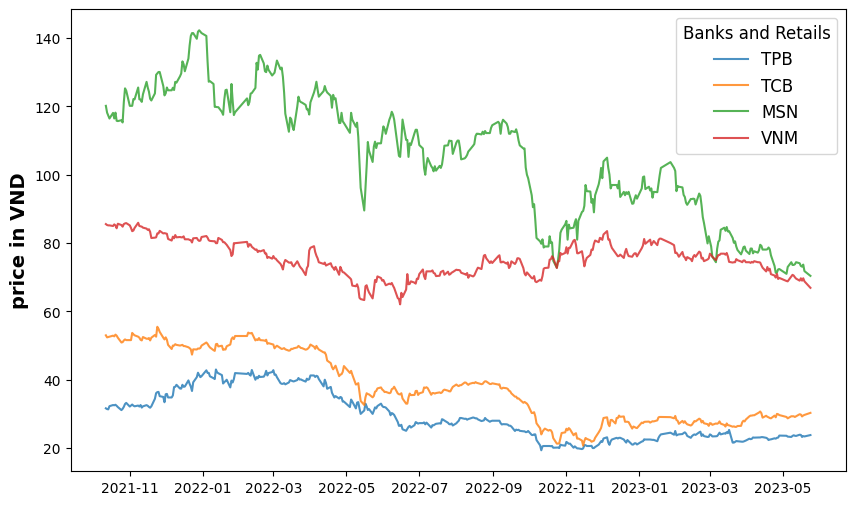

In [22]:
plt.figure(figsize=(10, 6))
for c in price_br.columns.values:
    plt.plot(price_br.index, price_br[c], lw=1.5, alpha=0.8,label=c)
plt.ylabel('price in VND', weight = 'bold', size=14)
plt.legend(fontsize="large", title="Banks and Retails", title_fontsize=12)

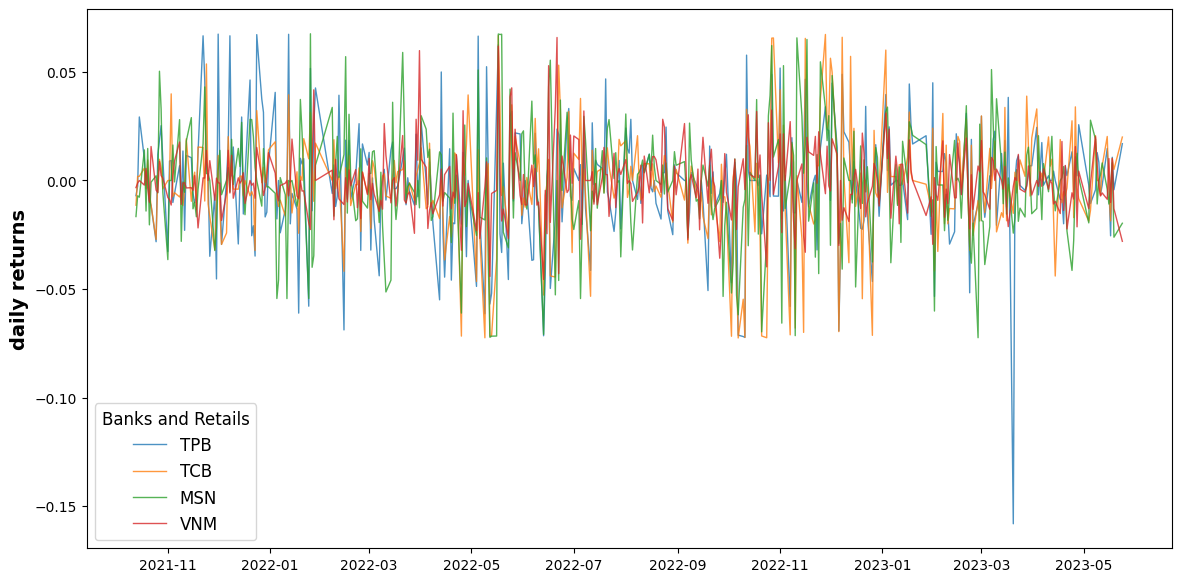

In [23]:
plt.figure(figsize=(14, 7))
for c in return_br.columns.values:
    plt.plot(return_br.index, return_br[c], lw=1., alpha=0.8,label=c)
plt.ylabel('daily returns', weight = 'bold', fontsize = 14)
plt.legend(fontsize="large", title="Banks and Retails", title_fontsize=12)

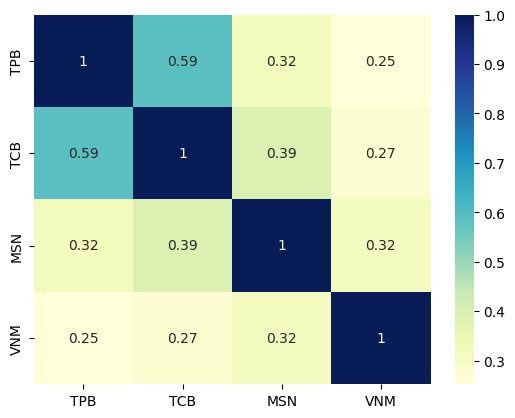

In [24]:
dataplot = sns.heatmap(return_br.corr(), cmap="YlGnBu", annot=True)

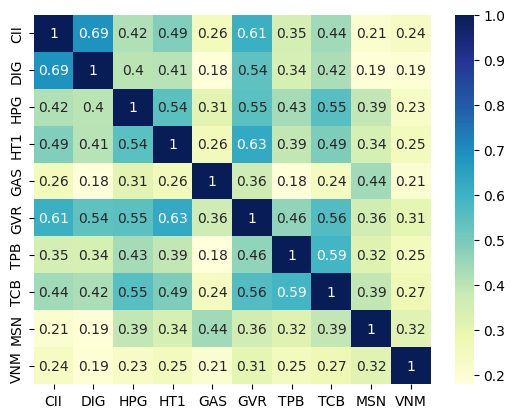

In [25]:
dataplot = sns.heatmap(return_df.corr(), cmap="YlGnBu", annot=True)

## **Portfolio Construction**

In [26]:
def annualised_portfolio_performance(mean, cov, weight, performance = None, num_trading_days = 252):
  if not all(isinstance(obj, np.ndarray) for obj in [mean, cov, weight]):
    warnings.warn('Mean, covariance, and weight must be numpy arrays!')
    port_weight = np.array(weight)
    if not port_weight.ndim == 2:
       port_weight = np.expand_dims(port_weight, axis = 1)
    if not port_weight.shape[1] == 1:
      port_weight = port_weight.reshape(-1, 1) # shape (N , 1)
      port_mean = np.array(mean).reshape(1, -1).dot(weight) * num_trading_days # shape (1, 1)
      port_vol = np.sqrt(port_weight.T.dot(np.array(cov)).dot(port_weight)) * np.sqrt(num_trading_days) # shape (1, 1)
      port_sharpe = port_mean / port_vol
    else:
      port_mean = np.array(mean).reshape(1, -1).dot(weight) * num_trading_days # shape (1, 1)
      port_vol = np.sqrt(port_weight.T.dot(np.array(cov)).dot(port_weight)) * np.sqrt(num_trading_days) # shape (1, 1)
      port_sharpe = port_mean / port_vol

      # Compute drawdown
      if performance is not None:
        max_drawdown = 0
        peak = performance[0]
        for x in performance:
          #update peak for each time
          if x > peak:
            peak = x
              
            drawdown = peak - x
              
            #update maxdrawdown:
            if drawdown > max_drawdown:
              max_drawdown = drawdown

          return port_mean, port_vol, port_sharpe, max_drawdown
    return port_mean, port_vol, port_sharpe

#### **Testing Functionality**

In [27]:
weight = np.random.dirichlet(np.ones(10),size=1)
annualised_portfolio_performance(return_df.mean(), return_df.cov(), weight)

<ipython-input-26-fb0857061d91>:3: UserWarning: Mean, covariance, and weight must be numpy arrays!
  warnings.warn('Mean, covariance, and weight must be numpy arrays!')


ValueError: ignored

### **Random Weight Portfolio**

In [28]:
def random_weight_porfolio(num_portfolios, num_stocks, mean, cov, risk_free):
  weight = np.zeros((num_portfolios, num_stocks))
  port_return = np.zeros((num_portfolios, 1))
  port_vol = np.zeros((num_portfolios, 1))
  port_sharpe = np.zeros((num_portfolios, 1))
  for i in range(num_portfolios):
    # May use Dirichlet distribution 
    # w = np.random.dirichlet(np.ones(num_stocks), size = 1).reshape(-1, 1)
    w = np.random.random(num_stocks)
    w /= np.sum(w)
    w = w.reshape(-1, 1)
    # Storing results
    
    port_mean, port_vol, port_sharpe= annualised_portfolio_performance(
        mean, cov, w, risk_free)
    portfolio[0, i] = port_mean
    portfolio[1, i] = port_vol
    portfolio[2, i] = port_sharpe
  return portfolio, weight

## **Mean-Variance Portfolio (CVXOPT)**

### **Setting Up Components For Optimization Problem**

In [96]:
return_df = pd.read_csv('drive/My Drive/data/return_data_portfolio_management.csv', parse_dates = ['date'], dayfirst = True)
return_df = return_df.set_index('date')

In [98]:
# Constant 
alpha_bound = 0.2
bound_group = 0.45
N_public_asset = 5
mean = (return_df.mean()).values
cov = (return_df.cov()).values

#### **First approach: List and Loops**

In [99]:
P = matrix(cov, tc = "d")
q = matrix(np.zeros(len(mean)), (len(mean),1), tc = "d")
G = []

# Positive allocation constraint (inequality)
for i in range(len(mean)):
  k = [0 for x in range(len(mean) - 1)]
  k.insert(i, -1)
  G.append(k)

# Group bounded condition (inequality)
for i in range(len(mean)):
  k = [0 for x in range(len(mean) - 1)]
  k.insert(i, 1)
  G.append(k)

# Transform into matrix 
G = matrix(np.array(G), tc="d")
H = np.concatenate((np.zeros(len(mean)),
                    [alpha_bound for i in range(len(mean))]), axis = None)
# H = np.hstack((np.zeros(len(mean)),
#                     [alpha_bound for i in range(len(mean))])) # Could use np.hstack with the same result
h = matrix(H, tc = "d")

# Equality constraints Ax = b
A = []
A.append(np.concatenate(([1 for i in range(N_public_asset)], 
              np.zeros(len(mean) - N_public_asset)), axis = None))
A.append([1 for i in range(len(mean))])

# Transform into matrix
A = matrix(np.array(A), tc = "d")

# restricted weight of public investment company to "bound_group" 
# and each weight must be add up to 1
b = matrix([bound_group, 1], (2,1), tc = "d")

In [100]:
sol = (solvers.qp(P, q, G, h, A, b)['x'])
optimal_weight = [x for x in sol]
weight_df = pd.DataFrame(optimal_weight, index = return_df.columns,
                         columns = ['Allocation'])
print(weight_df)

     Allocation
CII    0.199976
DIG    0.028491
HPG    0.081537
HT1    0.139991
HSG    0.000005
GAS    0.070034
GVR    0.023689
TPB    0.191730
TCB    0.064711
MSN    0.199835


#### **Second approach: Numpy functions**

In [101]:
# Positive allocation constraint (inequality)
k1 = np.zeros((10,10), int)
np.fill_diagonal(k1, -1)

# Group bounded condition (inequality)
k2 = np.eye(10, dtype = int)

# Transform into CVXOPT matrix 
G = matrix(np.concatenate((k1, k2), axis = 0), tc="d")
H = np.concatenate((np.zeros(len(mean)),
                    [alpha_bound for i in range(len(mean))]), axis = None)
h = matrix(H, tc = "d")

# Equality constraints Ax = b
A = np.hstack((np.ones(N_public_asset), 
          np.zeros(len(mean) - N_public_asset),
          np.ones(len(mean)))).reshape(-1, 10)
A = matrix(np.array(A), tc = "d")

# restricted weight of public investment company to "bound_group" 
# and each weight must be add up to 1
b = matrix([bound_group, 1], (2,1), tc = "d")

In [102]:
sol = (solvers.qp(P, q, G, h, A, b)['x'])
optimal_weight = [x for x in sol]
weight_df = pd.DataFrame(optimal_weight, index = return_df.columns,
                         columns = ['Allocation'])
print(weight_df)

     Allocation
CII    0.199976
DIG    0.028491
HPG    0.081537
HT1    0.139991
HSG    0.000005
GAS    0.070034
GVR    0.023689
TPB    0.191730
TCB    0.064711
MSN    0.199835


#### **Construct Function To Compute MV-Optimization**

In [103]:
def MV_portfolio_1(df, N_public_asset, alpha_bound, bound_group):
  mean = (df.mean()).values
  cov = (df.cov()).values
  P = matrix(cov, tc = "d")
  q = matrix(np.zeros(len(mean)), (len(mean),1), tc = "d")
  G = []
 
  #positive condition (inequality)
  for i in range(len(mean)):
    k = [0 for x in range(len(mean) - 1)]
    k.insert(i, -1)
    G.append(k)

  # bounded condition (inequality)
  for i in range(len(mean)):
    k = [0 for x in range(len(mean) - 1)]
    k.insert(i, 1)
    G.append(k)


  # Transform into matrix 
  G = matrix(np.array(G), tc="d")
  H = np.concatenate((np.zeros(len(mean)),
                      [alpha_bound for i in range(len(mean))]), axis = None)
  h = matrix(H, tc = "d")

  # Equality constraints Ax = b
  A = []
  A.append(np.concatenate(([1 for i in range(N_public_asset)], 
                np.zeros(len(mean) - N_public_asset)), axis = None))
  A.append([1 for i in range(len(mean))])

  # Transform into matrix
  A = matrix(np.array(A), tc = "d")

  # restricted weight of public investment company to "bound_group" 
  # and each weight must be add up to 1
  b = matrix([bound_group, 1], (2,1), tc = "d")

  sol = (solvers.qp(P, q, G, h, A, b)['x'])
  optimal_weight = [x for x in sol]

  return optimal_weight

In [104]:
def MV_portfolio_2(df, N_public_asset, alpha_bound, bound_group):
  mean = (df.mean()).values
  cov = (df.cov()).values
  P = matrix(cov, tc = "d")
  q = matrix(np.zeros(len(mean)), (len(mean),1), tc = "d")
  # Positive allocation constraint (inequality)
  k1 = np.zeros((10,10), int)
  np.fill_diagonal(k1, -1)

  # Group bounded condition (inequality)
  k2 = np.eye(10, dtype = int)

  # Transform into CVXOPT matrix 
  G = matrix(np.concatenate((k1, k2), axis = 0), tc="d")
  H = np.concatenate((np.zeros(len(mean)),
                      [alpha_bound for i in range(len(mean))]), axis = None)
  h = matrix(H, tc = "d")

  # Equality constraints Ax = b
  A = np.hstack((np.ones(N_public_asset), 
            np.zeros(len(mean) - N_public_asset),
            np.ones(len(mean)))).reshape(-1, 10)
  A = matrix(A, tc = "d")

  # restricted weight of public investment company to "bound_group" 
  # and each weight must be add up to 1
  b = matrix([bound_group, 1], (2,1), tc = "d")

  sol = (solvers.qp(P, q, G, h, A, b)['x'])
  optimal_weight = [x for x in sol]

  return optimal_weight

In [120]:
optimal_weight = MV_portfolio_1(return_df, N_public_asset = 5,
                               alpha_bound = 0.2, bound_group = 0.45)
# optimal_weight_2 = MV_portfolio_2(return_df, N_public_asset = 5,
#                                alpha_bound = 0.2, bound_group = 0.45)

# assert optimal_weight_1 == optimal_weight_2
weight_df = pd.DataFrame(optimal_weight, index = return_df.columns,
                         columns = ['Allocation'])
print(weight_df)

     Allocation
CII    0.199976
DIG    0.028491
HPG    0.081537
HT1    0.139991
HSG    0.000005
GAS    0.070034
GVR    0.023689
TPB    0.191730
TCB    0.064711
MSN    0.199835


### **Performance Training Periods**

In [106]:
weight = np.array(weight_df).reshape(-1,1)
train_performance = np.array(return_df).dot(weight)

cummulative_train_performance = np.cumprod(1 + train_performance) - 1 
annualised_portfolio_performance(mean =  return_df.mean(),
            cov = return_df.cov(),
             weight = optimal_weight,
             performance = list(cummulative_train_performance))

<ipython-input-26-fb0857061d91>:3: UserWarning: Mean, covariance, and weight must be numpy arrays!
  warnings.warn('Mean, covariance, and weight must be numpy arrays!')


(array([0.17911103]), array([[0.21845884]]), array([[0.81988456]]), 0)

<ipython-input-107-f3ec26c5737e>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


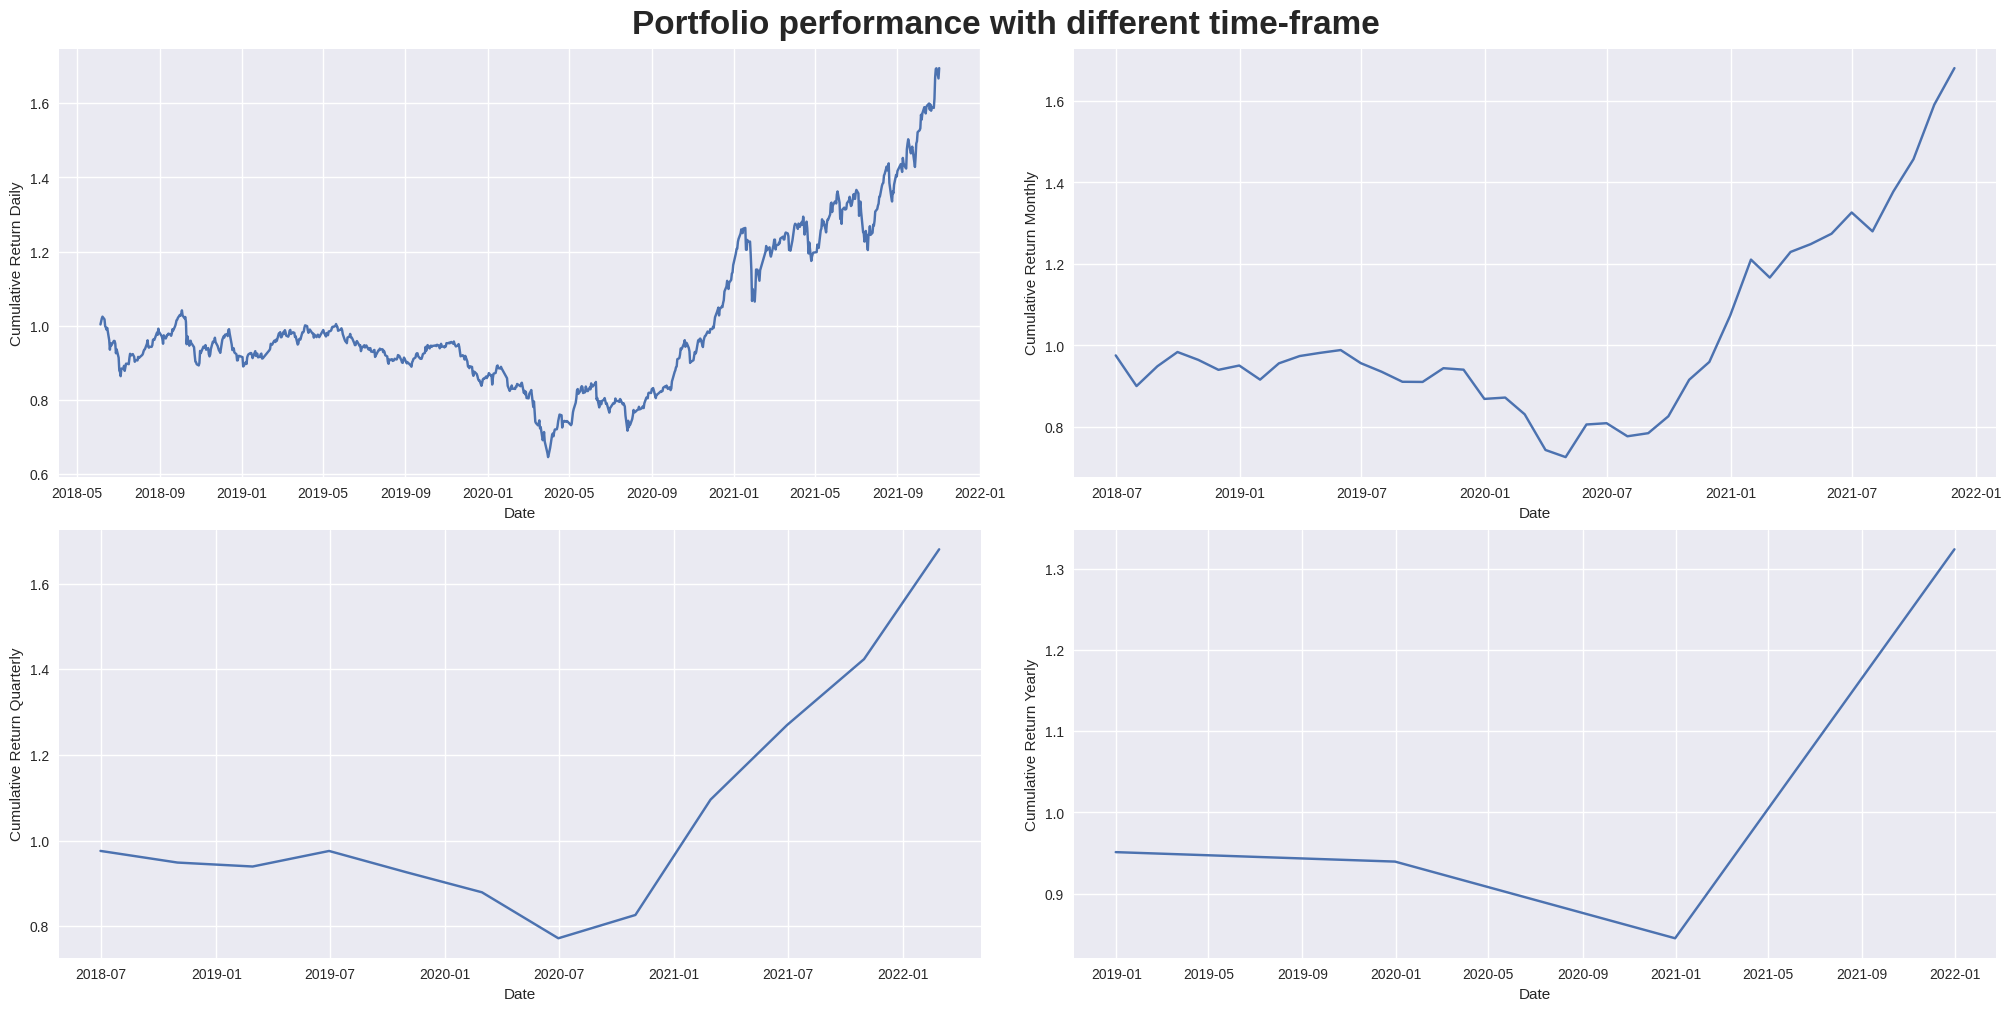

In [107]:
train_performance_df = pd.DataFrame(train_performance)
train_performance_df['date'] = pd.to_datetime(return_df.index)
train_performance_df.set_index('date', inplace =True)
cummulative_train_performance_df = (1 + train_performance_df).cumprod()
cummulative_train_performance_monthly = cummulative_train_performance_df.resample('M').mean()
cummulative_train_performance_quarterly = cummulative_train_performance_df.resample('4M').mean()
cummulative_train_performance_yearly = cummulative_train_performance_df.resample('Y').mean()

plt.style.use('seaborn')
fig, axes = plt.subplots(figsize = (20,10), nrows=2,ncols=2, constrained_layout=True)
fig.suptitle('Portfolio performance with different time-frame', weight="bold", size=24)
axes[0,0].plot(cummulative_train_performance_df)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Cumulative Return Daily')

axes[0,1].plot(cummulative_train_performance_monthly)
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Cumulative Return Monthly')

axes[1,0].plot(cummulative_train_performance_quarterly)
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Cumulative Return Quarterly')

axes[1,1].plot(cummulative_train_performance_yearly)
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Cumulative Return Yearly')
plt.show()

### **Visualizing weight**

In [108]:
def plot_weights(weights, ax=None):
  plt.figure(figsize = (14,6))
  ax = ax or plt.gca()
  weights = weights.T.to_dict('list')
  desc = sorted(weights.items(), key=lambda x: x[1], reverse=True)
  labels = [i[0] for i in desc]
  vals = [i[1] for i in desc]
  vals_flat = itertools.chain(*vals)
  vals = list(vals_flat)
  y_pos = np.arange(len(labels))
  ax.barh(y_pos, vals)
  ax.set_xlabel("Weight")
  ax.set_yticks(y_pos)
  ax.set_yticklabels(labels)
  ax.invert_yaxis()
  return ax

<Axes: xlabel='Weight'>

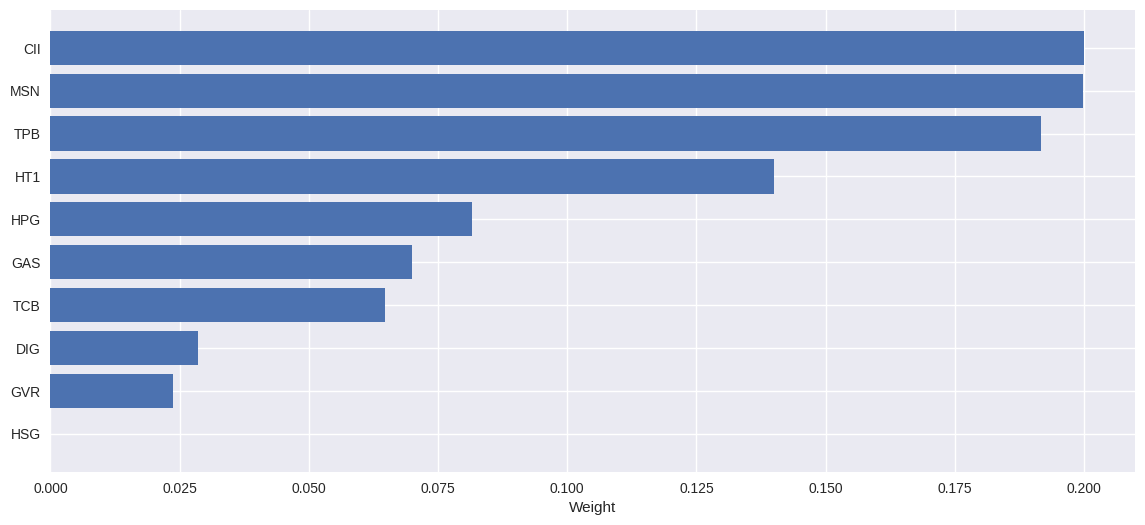

In [109]:
plot_weights(weight_df)

## **Mean-Variance Portfolio (CVXPY)**

### **Common Components**

In [110]:
w = cv.Variable((mean.shape[0], 1))
rf0 = cv.Parameter(nonneg=True)
rf0.value = 0
ret = w.T @ mean.reshape(-1, 1)
risk = cv.quad_form(w, cov)
k = cv.Variable((1,1))
risk_bound = 0

### **Minimize Risk Formulation**

In [111]:
# Setting matrices for equality constraints
B = np.ones((2, 10))
B[0, -6:] = 0.
b = np.array([[bound_group], 
              [1]])

obj = cv.Minimize(risk)
constraints = [cv.sum(w) == 1,
               B @ w == b]
constraints += [w <= 0.2,
                w >= 0]
prob = cv.Problem(obj, constraints)
for solver in [cv.ECOS, cv.SCS, cv.OSQP]:
  try:
    prob.solve(solver = solver)
    if w.value is not None:
      break
  except:
    pass

if w.value is not None: 
  optimal_weight_minrisk = w.value.reshape(mean.shape[0],1)
  optimal_weight_minrisk = list(np.squeeze(optimal_weight_minrisk/np.sum(optimal_weight_minrisk)))
  weight_df = pd.DataFrame(optimal_weight_minrisk, index = return_df.columns,
                          columns = ['Allocation'])
else:
  print('Optimal weight is not found!')

In [112]:
weight_df

,Allocation
CII,1.999999e-01
DIG,2.852254e-02
HPG,8.145807e-02
HT1,1.400195e-01
HSG,8.228189e-08
GAS,6.912773e-02
GVR,2.316023e-02
TPB,1.946949e-01
TCB,6.301743e-02
MSN,1.999996e-01


<Axes: xlabel='Weight'>

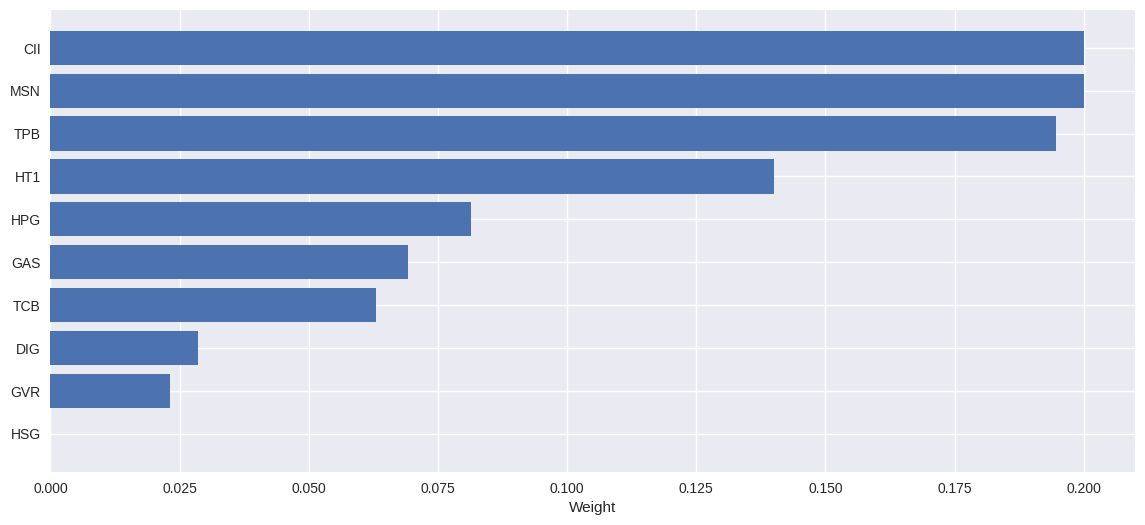

In [113]:
plot_weights(weight_df)

### **Maximize Return Formulation**

In [116]:
# Setting matrices for equality constraints
B = np.ones((2, 10))
B[0, -5:] = 0.
b = np.array([[bound_group], 
              [1]])

obj = cv.Maximize(ret)
constraints = [cv.sum(w) == 1,
               B @ w == b,
               risk <= risk_bound**2]
constraints += [w <= 0.2,
                w >= 0]
prob = cv.Problem(obj, constraints)
for solver in [cv.ECOS, cv.SCS, cv.OSQP]:
  try:
    prob.solve(solver = solver)
    if w.value is not None:
      break
  except:
    pass

if w.value is not None: 
  optimal_weight_maxprofit = w.value.reshape(mean.shape[0],1)
  optimal_weight_maxprofit = list(np.squeeze(optimal_weight_maxprofit/np.sum(optimal_weight_maxprofit)))
  weight_df = pd.DataFrame(optimal_weight_maxprofit, index = return_df.columns,
                        columns = ['Allocation'])
else:
  print('Optimal weight is not found!')

Optimal weight is not found!


### **Maximize Sharpe Ratio Formulation (Most commonly used)**

In [117]:
# Setting matrices for equality constraints
B = np.ones((2, 10))
B[0, -5:] = 0.
b = np.array([[bound_group], 
              [1]])

obj = cv.Minimize(risk*100)
constraints = [cv.sum(w) == k,
              B @ w == b,
               k >= 0,
               w.T @ mean.reshape(-1, 1) - rf0 * k == 1]
constraints += [w <= k * 0.2,
                w >= 0]
prob = cv.Problem(obj, constraints)
for solver in [cv.ECOS, cv.SCS, cv.OSQP]:
  try:
    prob.solve(solver = solver)
    if w.value is not None:
      break
  except:
    pass

if w.value is not None: 
  optimal_weight_maxprofit = w.value/k.value
  optimal_weight_maxprofit = optimal_weight_maxprofit.reshape(mean.shape[0],1)
  optimal_weight_maxprofit = list(np.squeeze(optimal_weight_maxprofit/np.sum(optimal_weight_maxprofit)))
  weight_df = pd.DataFrame(optimal_weight_maxprofit, index = return_df.columns,
                        columns = ['Allocation'])
else:
  print('Optimal weight is not found!')

Optimal weight is not found!


## **Visualzing Efficient Frontier**

In [121]:
def Efficient_frontier_plot(df, meanvec, cov_mat, optimal_weight, weight_df, title = 'Global Minimum Variance Portfolio'):   
  meanvec = np.array(meanvec).reshape(-1, 1)
  cov_mat = np.array(cov_mat)
  optimal_weight = np.array(optimal_weight)

  # Setting ups variables to store values
  np.random.seed(42)
  num_ports = 10000
  num_stock = df.shape[1]
  all_weights = np.zeros((num_ports,num_stock))
  ret_arr = np.zeros((num_ports,1))
  vol_arr = np.zeros((num_ports,1))
  sharpe_arr = np.zeros((num_ports,1))

  # Generate feasible portfolios set
  for x in range(num_ports):
    
    weights = np.array(np.random.random(num_stock))
    weights = weights/np.sum(weights)
    weights = weights.reshape(-1,1)
    # Save weights
    all_weights[x,:] = weights.T
    
    # Expected return
    ret_arr[x,:] = np.sum((meanvec * weights * 252))
    
    # Expected volatility
    vol_arr[x,:] = np.sqrt(np.dot(weights.T, np.dot(cov_mat*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x,:] = ret_arr[x,:]/vol_arr[x,:]
    
  # Volatility
  optimal_port_vol = np.sqrt(np.dot(optimal_weight.T, np.dot(cov_mat*252, optimal_weight)))
    
  # Return
  optimal_port_ret = np.sum((meanvec * optimal_weight * 252))

  # Weight dataframe
  weight_df['Allocation'] = [round(i*100, 2) for i in weight_df.Allocation]
  print ("-"*80)
  print ("Minimum Volatility Portfolio Allocation\n")
  print('Volatility of optimal portfolio: ', optimal_port_vol)
  print('Return of optimal portfolio: ', optimal_port_ret)
  print('Sharpe of optimal portfolio : ', optimal_port_ret/optimal_port_vol)
  
  print ("\n")
  print (weight_df.T)

  plt.style.use('ggplot')
  plt.figure(figsize=(12,8))
  plt.scatter(vol_arr, ret_arr, c = sharpe_arr, marker = "o", s = 10 ,label = "Feasible Sets", cmap='viridis')
  plt.colorbar(label='Sharpe Ratio')
  plt.xlabel('Volatility')
  plt.ylabel('Return')
  plt.scatter(optimal_port_vol, optimal_port_ret,c='red',label = "Optimal Portfolio", marker = "*" ,s=60) #red dot
  plt.legend(loc="upper left", markerscale=2., scatterpoints=1, fontsize=10)
  plt.title(title)
  plt.show()

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Volatility of optimal portfolio:  0.21845884113456848
Return of optimal portfolio:  2.596884913302218
Sharpe of optimal portfolio :  11.887296022515118


             CII   DIG   HPG   HT1  HSG  GAS   GVR    TPB   TCB    MSN
Allocation  20.0  2.85  8.15  14.0  0.0  7.0  2.37  19.17  6.47  19.98


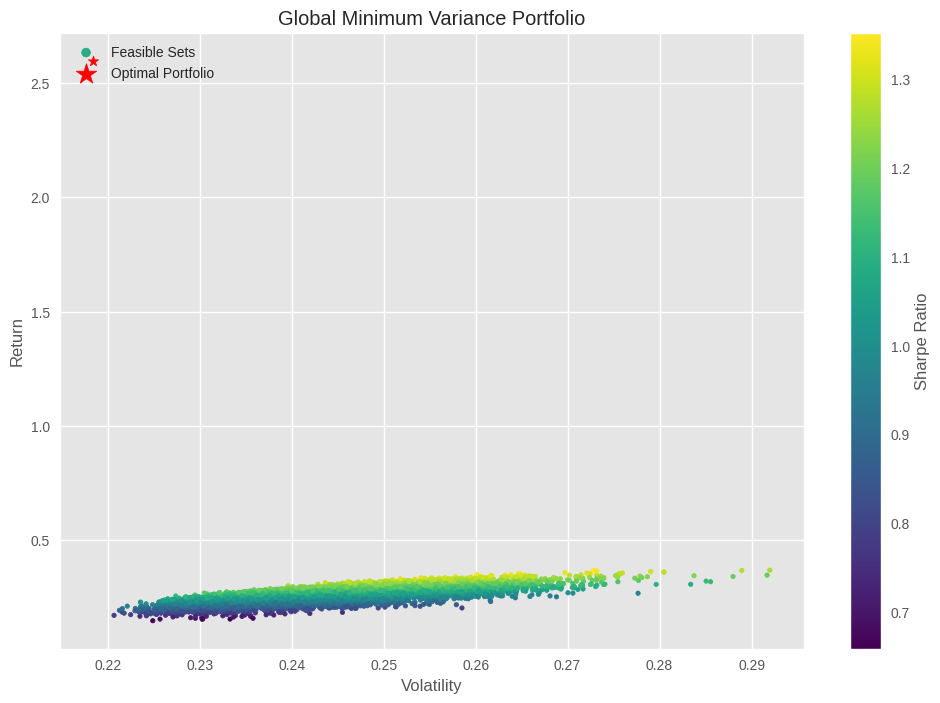

In [122]:
Efficient_frontier_plot(return_df, return_df.mean(), return_df.cov(), optimal_weight, weight_df)